In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import os
from collections import defaultdict
from matplotlib import cm
import matplotlib as mpl
mpl.style.use('classic')
plt.rcParams.update({'font.size':10})
import os.path, time
import math
import seaborn as sn

In [5]:
data_path = "<path to data>" # add the dir to data
algorithms = ["PPOBaseline","VAACBaseline","VPAC"]
labels = ["PPO", "VAAC", "VPAC"]
save_dir = os.path.join(data_path, "Plots")
if not os.path.exists(save_dir):
        os.makedirs(save_dir)


In [6]:
env = ["HalfCheetah","Hopper", "Walker2d"]
iterations = [1500, 1500, 2500]


/home/ayush/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


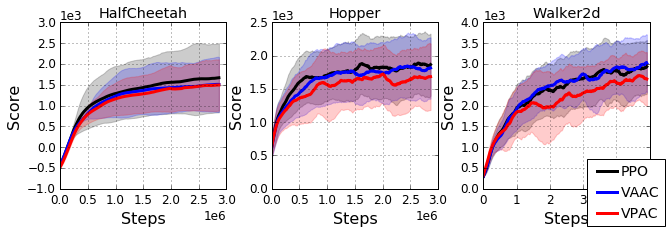

In [26]:
fig, axs = plt.subplots(ncols=3,figsize=(9, 3))
plt.tight_layout()
window = 100
colors_list = ['k', 'b', 'r', 'y', 'c', 'm']
k = 0
legend_x, legend_y = 1,1
steps = 2048
plt.rcParams.update({'font.size':12})
window_error_bars = 50
line_object = []

for env_index in range(3):
    k = 0
    neps = iterations[env_index]
    for algo in algorithms:
        file_path = os.path.join(data_path, algo)
        envs_name_npy = os.listdir(file_path)
        for f in envs_name_npy:
            if env[env_index] not in f:
                continue            
            data = np.load(os.path.join(file_path, f))[:,:neps]
            mean_val = np.mean(data, axis = 0)
            std_val = np.std(data, axis = 0)
            new_mean = []
            new_mean_std = []
            for eps in np.arange(0,neps - window):
                new_mean.append(np.mean(mean_val[eps: eps+window]))
                new_mean_std.append(np.mean(std_val[eps: eps+window]))

            new_mean = np.asarray(new_mean)
            new_mean_std = np.asarray(new_mean_std)
            x_axis = np.arange(0, neps - window)*steps
            l = axs[env_index].plot(x_axis, new_mean, label = algo + f,
                     linewidth = 3,color = colors_list[k])
            axs[env_index].fill_between(x_axis, new_mean - new_mean_std, new_mean + new_mean_std,
                        color = colors_list[k], alpha = 0.2)
            axs[env_index].title.set_text(env[env_index])
            k+=1
            if env_index == 3:
                line_object.append(l)
                
    axs[env_index].set_ylabel("Score",fontsize=16)
    axs[env_index].set_xlabel("Steps",fontsize=16)
    axs[env_index].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    axs[env_index].grid(True)

fig.legend(line_object,labels=labels,prop={'size': 14}, loc='lower right', handletextpad=0)
   
fig.savefig(os.path.join(save_dir, env[env_index]+".png"), dpi=150, facecolor='w', edgecolor='w',
           orientation='portrait', papertype=None, format=None,
           transparent=True, bbox_inches='tight', pad_inches=0,
           frameon=None)